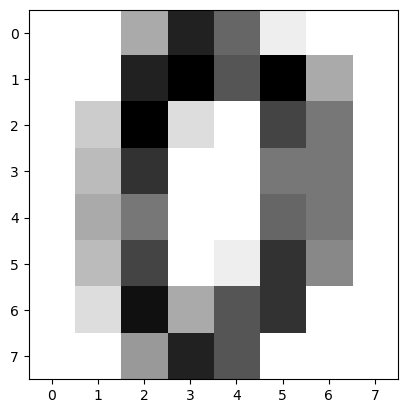

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')

In [2]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Epoch 1/20


C:\Users\Minseok\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.2826 - loss: 1.9285 - val_accuracy: 0.6944 - val_loss: 0.8562
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7305 - loss: 0.7828 - val_accuracy: 0.7833 - val_loss: 0.5758
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8170 - loss: 0.5103 - val_accuracy: 0.8361 - val_loss: 0.4989
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8872 - loss: 0.3788 - val_accuracy: 0.8917 - val_loss: 0.4144
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9104 - loss: 0.3356 - val_accuracy: 0.9194 - val_loss: 0.2894
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9515 - loss: 0.1778 - val_accuracy: 0.8972 - val_loss: 0.4611
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9271 - loss: 0.2462 - val_accuracy: 0.9222 - val_loss: 0.3933
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9568 - loss: 0.1603 - val_accuracy: 0.8972 - val_loss: 0.6133


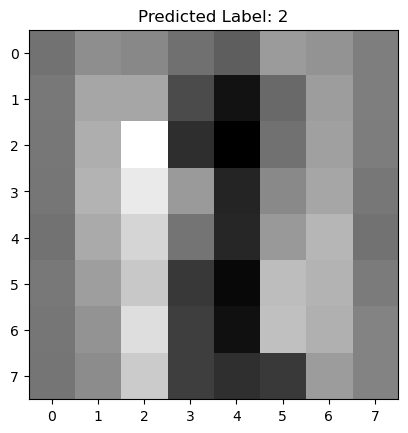

예측된 값: 2


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# 모델 생성 함수
def build_model_1():
    model = Sequential()
    model.add(Dense(10, input_shape=(64,), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(10, activation='softmax'))  # 10개의 클래스 출력
    model.compile(optimizer=Adam(learning_rate=0.04), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 데이터 로드 및 전처리
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
labels = digits.target

# 데이터 스케일링
scaler = StandardScaler()
data = scaler.fit_transform(data)

# 원핫 인코딩
encoder = OneHotEncoder(sparse_output=False)
labels = encoder.fit_transform(labels.reshape(-1, 1))

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = build_model_1()
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'테스트 정확도: {test_acc:.4f}')

# 이미지 예측 함수
def predict_image(index):
    image = X_test[index].reshape(8, 8)  # 테스트 데이터에서 이미지 가져오기
    image_data = scaler.transform(X_test[index].reshape(1, -1))  # 스케일링 적용
    prediction = model.predict(image_data)
    predicted_label = np.argmax(prediction)
    
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Predicted Label: {predicted_label}')
    plt.show()
    
    print(f'예측된 값: {predicted_label}')

# 예제 테스트
predict_image(10)
